# 1. Install and Import Dependencies

In [2]:
!pip3 list

Package                 Version
----------------------- --------------------
absl-py                 1.3.0
anyio                   3.6.2
appnope                 0.1.3
argon2-cffi             21.3.0
argon2-cffi-bindings    21.2.0
asttokens               2.0.8
attrs                   22.1.0
backcall                0.2.0
beautifulsoup4          4.11.1
bleach                  5.0.1
cachetools              5.2.0
certifi                 2022.9.24
cffi                    1.15.1
charset-normalizer      2.1.1
contourpy               1.0.5
cycler                  0.11.0
debugpy                 1.6.3
decorator               5.1.1
defusedxml              0.7.1
entrypoints             0.4
executing               1.1.1
fastjsonschema          2.16.2
fonttools               4.38.0
google-auth             2.13.0
google-auth-oauthlib    0.4.6
grpcio                  1.50.0
idna                    3.4
ipykernel               6.16.2
ipython                 8.5.0
ipython-genutils        0.2.0
jedi        

In [3]:
# Installation for linux, check website to get mac installation
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
You should consider upgrading via the '/Users/jorgealves/projects/personal/pwm-ml-ai-playground/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
!pip3 install -r yolov5/requirements.txt

You should consider upgrading via the '/Users/jorgealves/projects/personal/pwm-ml-ai-playground/venv/bin/python -m pip install --upgrade pip' command.


In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from IPython import display
from PIL import Image
%matplotlib inline

/Users/jorgealves/projects/personal/pwm-ml-ai-playground/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Model

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')

Using cache found in /Users/jorgealves/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-24 Python-3.10.4 torch-1.12.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


# 3. Make Detections with Images

In [8]:
img = 'https://www.gannett-cdn.com/presto/2022/05/26/NAAS/4926cb75-c0b2-4e8c-a635-1a72a42d5421-Austin_Traffic_jwj_0122.jpg'

In [9]:
results = model(img)
results.print()

image 1/1: 1891x3000 31 cars, 2 buss, 5 trucks
Speed: 449.2ms pre-process, 93.3ms inference, 12.7ms NMS per image at shape (1, 3, 416, 640)


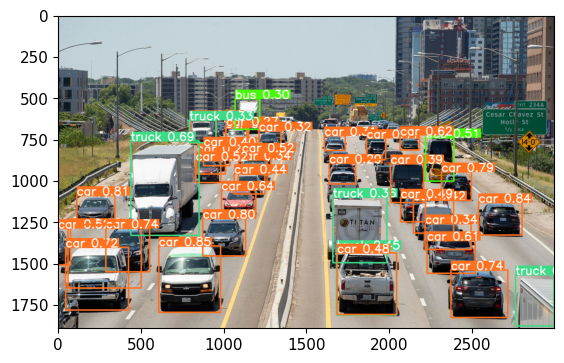

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Real Time Detections

2022-12-14 15:44:07.247 python[34947:452666] [VIRTCAM.PLUGIN]: Error from service: <dictionary: 0x7ff85a4e1750> { count = 1, transaction: 0, voucher = 0x0, contents =
	"XPCErrorDescription" => <string: 0x7ff85a4e18e8> { length = 18, contents = "Connection invalid" }
}
2022-12-14 15:44:07.247 python[34947:448892] [VIRTCAM.PLUGIN]: Server Connection Interrupted!
2022-12-14 15:44:07.247 python[34947:448892] [VIRTCAM.PLUGIN]: Error event from service: <dictionary: 0x7ff85a4e1750> { count = 1, transaction: 0, voucher = 0x0, contents =
	"XPCErrorDescription" => <string: 0x7ff85a4e18e8> { length = 18, contents = "Connection invalid" }
}


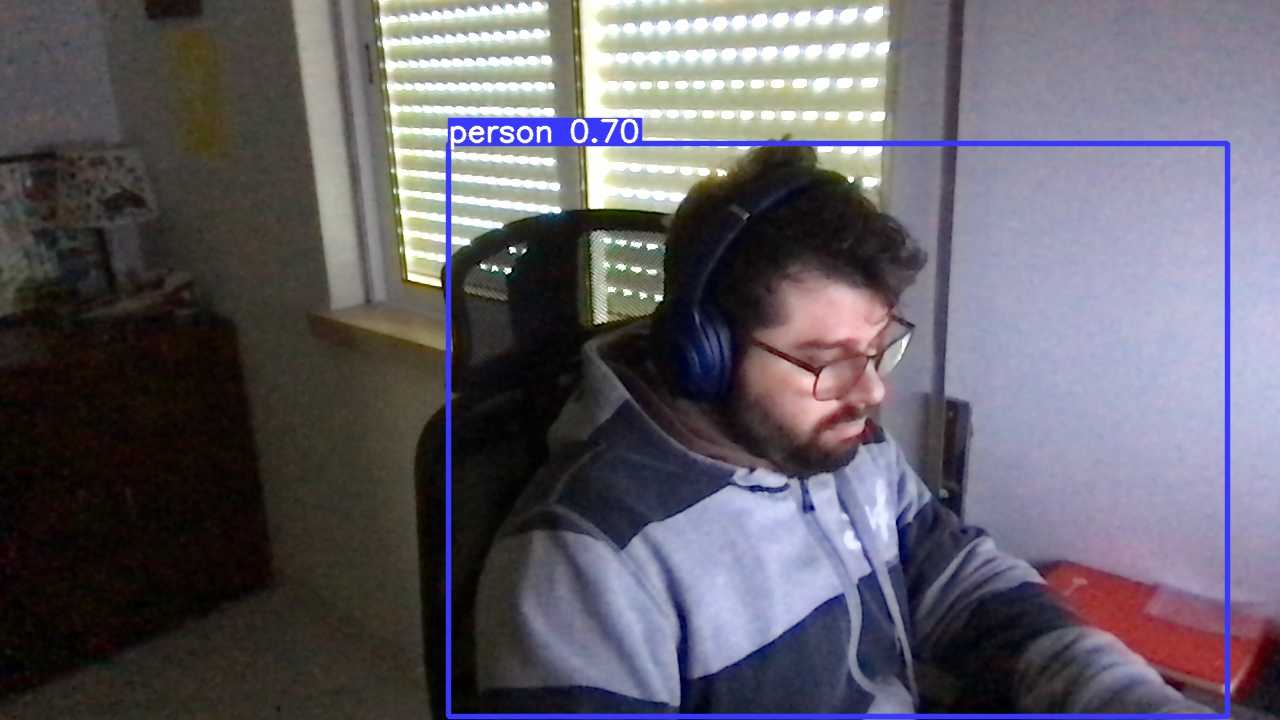

In [ ]:

def showVideo(VideoIndex=0, scale=0.5):
    try:
        cap = cv2.VideoCapture(VideoIndex)
    except:
        print("Cannot Open Device")
    try:
        ret, frame = cap.read()
        
        while(ret==True):
            # Capture frame-by-frame
            ret, frame = cap.read()
            
            if not ret:
                # Release the Video Device if ret is false
                cap.release()
                # Message to be displayed after releasing the device
                print ("Released Video Resource")
                break
            #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = model(frame)
            half_frame = cv2.resize(np.squeeze(results.render()), (0, 0), fx = scale, fy = scale)
            #this fixed the pipeline issue as the imshow was converting to 
            #png!!!!
            #credit: 
            # https://medium.com/@kostal91/displaying-real-time-webcam-stream-in-ipython-at-relatively-high-framerate-8e67428ac522
            _,ret_array = cv2.imencode('.jpg', half_frame) 
            i = display.Image(data=ret_array)
            display.display(i)
            display.clear_output(wait=True)
            
    except KeyboardInterrupt:
        # Release the Video Device
        cap.release()
        # Message to be displayed after releasing the device
        print("Released Video Resource from KeyboardInterrupt")
    pass
showVideo(0, 1)

# 5. Train from scratch

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
if not os.path.exists('data'):
    os.mkdir('data')
if not os.path.exists('data/labels'):
    os.mkdir('data/labels')
if not os.path.exists('data/images'):
    os.mkdir('data/images')
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['YOUR NAME']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        try:     
            # Capture frame-by-frame
            ret, frame = cap.read()

            if not ret:
                # Release the Video Device if ret is false
                cap.release()
                # Message to be displayed after releasing the device
                print ("Released Video Resource")
                break
            # Naming out image path
            imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

            # Writes out image to file 
            cv2.imwrite(imgname, frame)
            _,ret_array = cv2.imencode('.jpg', frame) 
            i = display.Image(data=ret_array)
            display.display(i)


            # Render to the screen
            #cv2.imshow('Image Collection', frame)

            # 2 second delay between captures
            time.sleep(5)
            display.clear_output(wait=True)
            
        except KeyboardInterrupt:
            # Release the Video Device
            cap.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource from KeyboardInterrupt")
        pass

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
# commands for linux (check labelImg website for instructions for mac)
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
# First clear /labelimg/data/predefined_classes.txt and keep it blank
# To initiate the labemImg up run in the console -> python labelImg/labelImg.py
# select "open dir" and choose the data/images folder
# selct "change save dir" and choose the data/labels folder
# change saving model to yolo (bellow save button)
# then save the annotation and do the same for the next images

# at the end go to the labels

# get Dataset in https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

In [ ]:
!python yolov5/train.py --img 320 --batch 16 --epochs 500 --data yolov5/dataset.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'andre.6cce3fd2-5159-11ed-9477-0fd44767cf9f.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    image = frame.copy()
    
    for prediction in results.pred[0].numpy():
        if prediction[4] >= 0.1:
            box = [prediction[0], prediction[1], prediction[2], prediction[3]]
            region = image[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
            # blur the region
            blured_img = cv2.blur(region, (20, 20))
            # replace the blured region in the image
            image[int(box[1]):int(box[3]), int(box[0]):int(box[2])] = blured_img
    # Make detections 
    
    
    cv2.imshow('YOLO', np.squeeze(image))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()